In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('./DiabetesDataset.csv')
df1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<AxesSubplot:title={'center':'Correlation with Diabetes_binary'}>

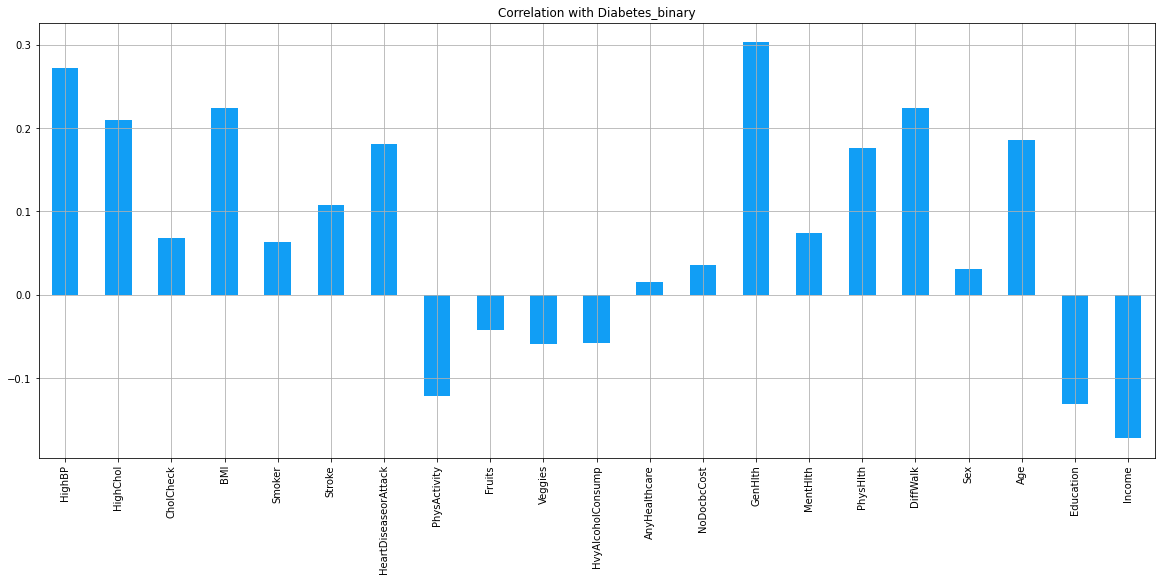

In [3]:
df1.drop('Diabetes_012', axis=1).corrwith(df1.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="#119ef5")

In [4]:
df1.drop('Diabetes_012', axis=1).corrwith(df1.Diabetes_012).abs().sort_values(ascending=True)[:4].index

Index(['AnyHealthcare', 'Sex', 'NoDocbcCost', 'Fruits'], dtype='object')

In [5]:
df1.drop(['AnyHealthcare', 'Sex', 'NoDocbcCost', 'Fruits'] , inplace=True , axis=1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  GenHlth               253680 non-null  float64
 12  MentHlth              253680 non-null  float64
 13  PhysHlth              253680 non-null  float64
 14  DiffWalk              253680 non-null  float64
 15  

<AxesSubplot:title={'center':'Label Distribution'}>

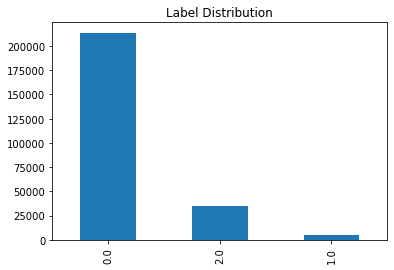

In [7]:
df1['Diabetes_012'].value_counts().plot(kind = 'bar', title = 'Label Distribution')

<AxesSubplot:title={'center':'Label Distribution after Oversampling'}>

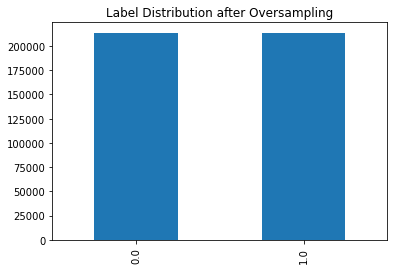

In [8]:
class_0 = df1[df1['Diabetes_012'] == 0]
class_1 = df1[df1['Diabetes_012'] == 1]
class_1_over = class_1.sample(len(class_0), replace=True)
df1_new = pd.concat([class_1_over, class_0], axis=0)
df1_new['Diabetes_012'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

In [9]:
x = df1_new.drop('Diabetes_012', axis = 1) # features
y = df1_new[['Diabetes_012']] # labels
x_train ,x_test ,y_train ,y_test =train_test_split( x,y,train_size =0.8) # 0.8 for training,0.2 for test
DT=DecisionTreeClassifier(max_depth=25, random_state=0)
DT.fit(x_train, y_train) # Use features and labels for training to fit the model
train_acc=DT.score(x_train, y_train)# for training performance evaluation
test_acc=DT.score(x_test, y_test)# Use testdataset to evaluate the performance of model
print('---DecisionTreeClassifier---')
print('train acc:', train_acc)
print('test acc:', test_acc)

---DecisionTreeClassifier---
train acc: 0.9801798060387689
test acc: 0.9674785334924312


In [10]:
confusion_matrix(y_test, DT.predict(x_test))

array([[40015,  2656],
       [  124, 42687]], dtype=int64)

In [11]:
x = df1_new.drop('Diabetes_012', axis = 1) # features
y = df1_new[['Diabetes_012']] # labels
x_train ,x_test ,y_train ,y_test =train_test_split( x,y,train_size =0.8)# 0.8 for training,0.2 for test
RF = RandomForestClassifier(n_estimators = 300, random_state=0)
RF.fit(x_train, y_train)# fitting the model on the train data
train_acc1 = RF.score(x_train, y_train)# for training performance evaluation
test_acc1 = RF.score(x_test, y_test)# Use testdataset to evaluate the performance of model
print('---RandomForestClassifier---')
print('train acc:', train_acc1)
print('test acc:', test_acc1)

<ipython-input-11-93b4684b10de>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)# fitting the model on the train data


---RandomForestClassifier---
train acc: 0.9948058632912578
test acc: 0.9939519430991319


In [12]:
confusion_matrix(y_test, RF.predict(x_test))

array([[42290,   489],
       [   28, 42675]], dtype=int64)

In [13]:
from xgboost import XGBClassifier
x = df1_new.drop('Diabetes_012', axis = 1) # features
y = df1_new[['Diabetes_012']] # labels
x_train ,x_test ,y_train ,y_test =train_test_split( x,y,train_size =0.8) # 0.8 for training,0.2 for test

xgboostModel = XGBClassifier(n_estimators = 300, max_depth=25)
xgboostModel.fit(x_train, y_train)
print('---xgboostModel---')
print('train acc:', xgboostModel.score(x_train, y_train))
print('test acc:', xgboostModel.score(x_test, y_test))

---xgboostModel---
train acc: 0.9947824662790562
test acc: 0.990945462202569


In [14]:
confusion_matrix(y_test, xgboostModel.predict(x_test))

array([[41958,   731],
       [   43, 42750]], dtype=int64)